In [1]:
import textwrap
import numpy as np
import pandas as pd

import google.generativeai as genai
import google.ai.generativelanguage as glm
import os
# Used to securely store your API key
from IPython.display import Markdown
from dotenv import load_dotenv
load_dotenv()
GOOGLE_API_KEY: str = os.getenv('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)
import tqdm as notebook_tqdm
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

/home/ishaquenizamani/anaconda3/envs/prompt/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df  = pd.read_csv("train.csv")
df.head(4)

,id,question,opa,opb,opc,opd,cop,choice_type,exp,subject_name,topic_name
0,e9ad821a-c438-4965-9f77-760819dfa155,Chronic urethral obstruction due to benign pri...,Hyperplasia,Hyperophy,Atrophy,Dyplasia,2,single,Chronic urethral obstruction because of urinar...,Anatomy,Urinary tract
1,e3d3c4e1-4fb2-45e7-9f88-247cc8f373b3,Which vitamin is supplied from only animal sou...,Vitamin C,Vitamin B7,Vitamin B12,Vitamin D,2,single,Ans. (c) Vitamin B12 Ref: Harrison's 19th ed. ...,Biochemistry,Vitamins and Minerals
2,5c38bea6-787a-44a9-b2df-88f4218ab914,All of the following are surgical options for ...,Adjustable gastric banding,Biliopancreatic diversion,Duodenal Switch,Roux en Y Duodenal By pass,3,multi,"Ans. is 'd' i.e., Roux en Y Duodenal Bypass Ba...",Surgery,Surgical Treatment Obesity
3,cdeedb04-fbe9-432c-937c-d53ac24475de,Following endaerectomy on the right common car...,Central aery of the retina,Infraorbital aery,Lacrimal aery,Nasociliary aretry,0,multi,The central aery of the retina is a branch of ...,Ophthalmology,NaN


In [3]:
df_without_id = df.drop(['id'], axis=1, inplace=False)
df_without_id.head(4) 

,question,opa,opb,opc,opd,cop,choice_type,exp,subject_name,topic_name
0,Chronic urethral obstruction due to benign pri...,Hyperplasia,Hyperophy,Atrophy,Dyplasia,2,single,Chronic urethral obstruction because of urinar...,Anatomy,Urinary tract
1,Which vitamin is supplied from only animal sou...,Vitamin C,Vitamin B7,Vitamin B12,Vitamin D,2,single,Ans. (c) Vitamin B12 Ref: Harrison's 19th ed. ...,Biochemistry,Vitamins and Minerals
2,All of the following are surgical options for ...,Adjustable gastric banding,Biliopancreatic diversion,Duodenal Switch,Roux en Y Duodenal By pass,3,multi,"Ans. is 'd' i.e., Roux en Y Duodenal Bypass Ba...",Surgery,Surgical Treatment Obesity
3,Following endaerectomy on the right common car...,Central aery of the retina,Infraorbital aery,Lacrimal aery,Nasociliary aretry,0,multi,The central aery of the retina is a branch of ...,Ophthalmology,NaN


In [4]:
df_without_id.shape

(182822, 10)

In [5]:
df_without_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182822 entries, 0 to 182821
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   question      182822 non-null  object
 1   opa           182817 non-null  object
 2   opb           182820 non-null  object
 3   opc           182799 non-null  object
 4   opd           180095 non-null  object
 5   cop           182822 non-null  int64 
 6   choice_type   182822 non-null  object
 7   exp           160849 non-null  object
 8   subject_name  182822 non-null  object
 9   topic_name    87209 non-null   object
dtypes: int64(1), object(9)
memory usage: 13.9+ MB


In [6]:
df_without_topic_name = df_without_id.drop(['topic_name'], axis=1, inplace=False)
df_without_topic_name.head(4)

,question,opa,opb,opc,opd,cop,choice_type,exp,subject_name
0,Chronic urethral obstruction due to benign pri...,Hyperplasia,Hyperophy,Atrophy,Dyplasia,2,single,Chronic urethral obstruction because of urinar...,Anatomy
1,Which vitamin is supplied from only animal sou...,Vitamin C,Vitamin B7,Vitamin B12,Vitamin D,2,single,Ans. (c) Vitamin B12 Ref: Harrison's 19th ed. ...,Biochemistry
2,All of the following are surgical options for ...,Adjustable gastric banding,Biliopancreatic diversion,Duodenal Switch,Roux en Y Duodenal By pass,3,multi,"Ans. is 'd' i.e., Roux en Y Duodenal Bypass Ba...",Surgery
3,Following endaerectomy on the right common car...,Central aery of the retina,Infraorbital aery,Lacrimal aery,Nasociliary aretry,0,multi,The central aery of the retina is a branch of ...,Ophthalmology


In [7]:
df_filtered = df_without_topic_name.dropna()

In [8]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158396 entries, 0 to 182820
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   question      158396 non-null  object
 1   opa           158396 non-null  object
 2   opb           158396 non-null  object
 3   opc           158396 non-null  object
 4   opd           158396 non-null  object
 5   cop           158396 non-null  int64 
 6   choice_type   158396 non-null  object
 7   exp           158396 non-null  object
 8   subject_name  158396 non-null  object
dtypes: int64(1), object(8)
memory usage: 12.1+ MB


In [9]:
df_filtered['cop'].describe()

count    158396.000000
mean          1.369479
std           1.117392
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max           3.000000
Name: cop, dtype: float64

In [10]:
df_filtered.isnull().sum()

question        0
opa             0
opb             0
opc             0
opd             0
cop             0
choice_type     0
exp             0
subject_name    0
dtype: int64

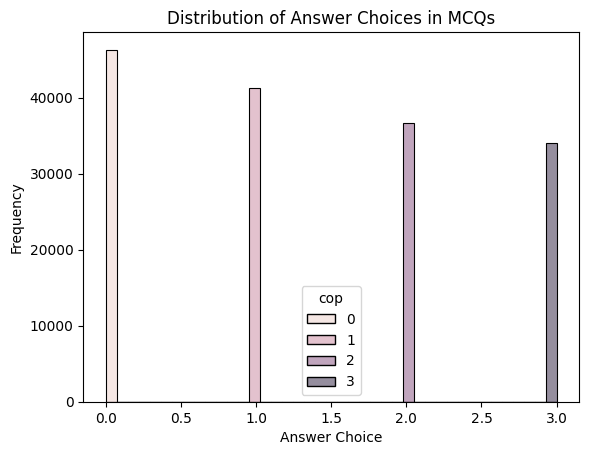

In [11]:
sns.histplot(data=df_filtered, x='cop', hue='cop')  # Consider hue for multiple datasets
plt.xlabel('Answer Choice')
plt.ylabel('Frequency')
plt.title('Distribution of Answer Choices in MCQs')
plt.show()


In [12]:
df_filtered.head(6)

,question,opa,opb,opc,opd,cop,choice_type,exp,subject_name
0,Chronic urethral obstruction due to benign pri...,Hyperplasia,Hyperophy,Atrophy,Dyplasia,2,single,Chronic urethral obstruction because of urinar...,Anatomy
1,Which vitamin is supplied from only animal sou...,Vitamin C,Vitamin B7,Vitamin B12,Vitamin D,2,single,Ans. (c) Vitamin B12 Ref: Harrison's 19th ed. ...,Biochemistry
2,All of the following are surgical options for ...,Adjustable gastric banding,Biliopancreatic diversion,Duodenal Switch,Roux en Y Duodenal By pass,3,multi,"Ans. is 'd' i.e., Roux en Y Duodenal Bypass Ba...",Surgery
3,Following endaerectomy on the right common car...,Central aery of the retina,Infraorbital aery,Lacrimal aery,Nasociliary aretry,0,multi,The central aery of the retina is a branch of ...,Ophthalmology
4,Growth hormone has its effect on growth through?,Directly,IG1-1,Thyroxine,Intranuclear receptors,1,single,"Ans. is 'b' i.e., IGI-1GH has two major functi...",Physiology
5,Scrub typhus is transmitted by: September 2004,Louse,Tick,Mite,Milk,2,single,Ans. C i.e. Mite,Social & Preventive Medicine


In [13]:
test_df = df_filtered.copy()

In [14]:
import pandas as pd

def get_correct_answer(row):
  """
  Function to return the actual chosen answer based on the answer code (cop)
  """
  if row['cop'] == 0:
    return row['opa']
  elif row['cop'] == 1:
    return row['opb']
  elif row['cop'] == 2:
    return row['opc']
  elif row['cop'] == 3:
    return row['opd']
  else:
    # Handle cases where cop has unexpected values (optional)
    return 'Invalid Answer Code'  # Or raise an error

# Apply the function to create the 'corr_ans' column
test_df['corr_ans'] = test_df.apply(get_correct_answer, axis=1)

# Print the resulting DataFrame (optional)
test_df


,question,opa,opb,opc,opd,cop,choice_type,exp,subject_name,corr_ans
0,Chronic urethral obstruction due to benign pri...,Hyperplasia,Hyperophy,Atrophy,Dyplasia,2,single,Chronic urethral obstruction because of urinar...,Anatomy,Atrophy
1,Which vitamin is supplied from only animal sou...,Vitamin C,Vitamin B7,Vitamin B12,Vitamin D,2,single,Ans. (c) Vitamin B12 Ref: Harrison's 19th ed. ...,Biochemistry,Vitamin B12
2,All of the following are surgical options for ...,Adjustable gastric banding,Biliopancreatic diversion,Duodenal Switch,Roux en Y Duodenal By pass,3,multi,"Ans. is 'd' i.e., Roux en Y Duodenal Bypass Ba...",Surgery,Roux en Y Duodenal By pass
3,Following endaerectomy on the right common car...,Central aery of the retina,Infraorbital aery,Lacrimal aery,Nasociliary aretry,0,multi,The central aery of the retina is a branch of ...,Ophthalmology,Central aery of the retina
4,Growth hormone has its effect on growth through?,Directly,IG1-1,Thyroxine,Intranuclear receptors,1,single,"Ans. is 'b' i.e., IGI-1GH has two major functi...",Physiology,IG1-1
...,...,...,...,...,...,...,...,...,...,...
182815,Organism that causes emphysematous cholecystit...,Salmonella typhi,Cytomegalovirus,Clostridium perfringens,Bacteroides,2,single,Ref: Harrison's 18th editionExplanation:Emphys...,Medicine,Clostridium perfringens
182817,Most common site for extra mammary Paget&;s di...,Vulva,Vagina,Penis,Anus,0,single,.It is superficial manifestation of an intradu...,Surgery,Vulva
182818,Inferior Rib notching is seen in all except?,Coarctation of aoa,Classical blalock tausing operation,SVC obstruction,Neurofibromatosis,3,multi,Answer is D (Neurofibromatosis) Neurofibromato...,Medicine,Neurofibromatosis
182819,Which is false regarding cryptococcus neoformans?,Grows at 5degC and 37degC,It has 4 serotypes,Urease negative,Causes superficial skin infection,2,multi,"Ans. is 'c' i e., Urease negative Cryptococcus...",Microbiology,Urease negative


In [15]:
column_names = ['question', 'opa', 'opb', 'opc', 'opd', 'corr_ans' , 'exp']
new_df = test_df[column_names]

In [16]:
new_df

,question,opa,opb,opc,opd,corr_ans,exp
0,Chronic urethral obstruction due to benign pri...,Hyperplasia,Hyperophy,Atrophy,Dyplasia,Atrophy,Chronic urethral obstruction because of urinar...
1,Which vitamin is supplied from only animal sou...,Vitamin C,Vitamin B7,Vitamin B12,Vitamin D,Vitamin B12,Ans. (c) Vitamin B12 Ref: Harrison's 19th ed. ...
2,All of the following are surgical options for ...,Adjustable gastric banding,Biliopancreatic diversion,Duodenal Switch,Roux en Y Duodenal By pass,Roux en Y Duodenal By pass,"Ans. is 'd' i.e., Roux en Y Duodenal Bypass Ba..."
3,Following endaerectomy on the right common car...,Central aery of the retina,Infraorbital aery,Lacrimal aery,Nasociliary aretry,Central aery of the retina,The central aery of the retina is a branch of ...
4,Growth hormone has its effect on growth through?,Directly,IG1-1,Thyroxine,Intranuclear receptors,IG1-1,"Ans. is 'b' i.e., IGI-1GH has two major functi..."
...,...,...,...,...,...,...,...
182815,Organism that causes emphysematous cholecystit...,Salmonella typhi,Cytomegalovirus,Clostridium perfringens,Bacteroides,Clostridium perfringens,Ref: Harrison's 18th editionExplanation:Emphys...
182817,Most common site for extra mammary Paget&;s di...,Vulva,Vagina,Penis,Anus,Vulva,.It is superficial manifestation of an intradu...
182818,Inferior Rib notching is seen in all except?,Coarctation of aoa,Classical blalock tausing operation,SVC obstruction,Neurofibromatosis,Neurofibromatosis,Answer is D (Neurofibromatosis) Neurofibromato...
182819,Which is false regarding cryptococcus neoformans?,Grows at 5degC and 37degC,It has 4 serotypes,Urease negative,Causes superficial skin infection,Urease negative,"Ans. is 'c' i e., Urease negative Cryptococcus..."


In [17]:
separator = ','
one_column_df = pd.DataFrame([separator.join(map(str, row)) for row in new_df.itertuples(index=False)], columns=['question_with_answer'])
one_column_df.head(4)

,question_with_answer
0,Chronic urethral obstruction due to benign pri...
1,Which vitamin is supplied from only animal sou...
2,All of the following are surgical options for ...
3,Following endaerectomy on the right common car...


In [18]:
load_dotenv()
GOOGLE_API_KEY: str = os.getenv('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

In [20]:
for m in genai.list_models():
  if 'embedContent' in m.supported_generation_methods:
    print(m.name)


models/embedding-001


In [21]:
import pandas as pd
from nltk.corpus import stopwords  # for stopword removal
from nltk.stem import PorterStemmer  # for stemming (optional)
from nltk.tokenize import word_tokenize  # for tokenization


In [27]:
title = "The next generation of AI for developers and Google Workspace"
sample_text = ("Title: The next generation of AI for developers and Google Workspace"
    "\n"
    "Full article:\n"
    "\n"
    "Gemini API & Google AI Studio: An approachable way to explore and prototype with generative AI applications")

model = 'models/embedding-001'
embedding = genai.embed_content(model=model,
                                content=sample_text,
                                task_type="retrieval_document",
                                title=title)

print(embedding)


{'embedding': [0.03411343, -0.05517662, -0.020209055, -0.0041249567, 0.058917783, 0.014129515, 0.0045353593, 0.0014303668, 0.05976634, 0.08292115, 0.007162964, 0.0069041685, -0.053083427, -0.010905125, 0.0321402, -0.037163995, 0.050372455, 0.019348344, -0.037328612, 0.026647927, 0.030781753, -0.011288501, -0.031485256, -0.060248993, -0.026219442, -0.009794235, 0.006630139, -0.01846516, -0.026324715, 0.020442624, -0.06317684, 0.014559574, -0.052296035, 0.016451128, -9.720217e-05, -0.051706687, -0.0054406044, -0.056967627, 0.011144145, -0.009201792, -0.0021951047, -0.1099701, -0.011712193, 0.021221714, 0.009171804, -0.029621972, 0.034534883, 0.039578073, 0.019021519, -0.06269169, 0.039473332, 0.052403256, 0.061814185, -0.034507945, -0.009557816, -0.0049551064, 0.017839009, -0.021176832, 0.015043588, 0.015390569, -0.006334281, 0.043696404, -0.028341983, 0.028433999, 0.01472686, -0.06585564, -0.044533554, 0.0055523133, 0.035775978, 0.031099156, 0.027357662, 0.028062241, 0.056972917, -0.054

In [22]:
def preprocess_text(text):
    """
    Preprocesses text for vector embeddings.

    Args:
        text: The text to preprocess.

    Returns:
        The preprocessed text.
    """
    lowercase_text = text.lower()  # Lowercase conversion

    # Remove punctuation
    # You can use a regular expression for more granular control
    punc_free_text = ''.join(c for c in lowercase_text if c.isalnum() or c.isspace())

    # Stopword removal
    stop_words = stopwords.words('english')
    stopword_removed_text = [word for word in punc_free_text.split() if word not in stop_words]

    # Optional: Stemming or Lemmatization
    # Choose one of the following based on your needs
    # stemmer = PorterStemmer()
    # stemmed_text = [stemmer.stem(word) for word in stopword_removed_text]

    # lemmatizer = WordNetLemmatizer()  # Requires NLTK download
    # lemmatized_text = [lemmatizer.lemmatize(word) for word in stopword_removed_text]

    # You can choose other pre-processing steps like N-gram generation here

    return ' '.join(stopword_removed_text)  # Join preprocessed words


In [23]:
one_column_df['preprocessed_text'] = one_column_df['question_with_answer'].apply(preprocess_text)

In [24]:
one_column_df.head(5)

,question_with_answer,preprocessed_text
0,Chronic urethral obstruction due to benign pri...,chronic urethral obstruction due benign prisma...
1,Which vitamin is supplied from only animal sou...,vitamin supplied animal sourcevitamin cvitamin...
2,All of the following are surgical options for ...,following surgical options morbid obesity exce...
3,Following endaerectomy on the right common car...,following endaerectomy right common carotid pa...
4,Growth hormone has its effect on growth throug...,growth hormone effect growth throughdirectlyig...


In [31]:
# Get the embeddings of each text and add to an embeddings column in the dataframe
def embed_fn( text):
  return genai.embed_content(model=model,
                             content=text,
                             task_type="retrieval_document",
                             )["embedding"]


In [34]:
# one_column_df['Embeddings'] = one_column_df.apply(lambda row: embed_fn(text=row['preprocessed_text']), axis=1)
# one_column_df

DeadlineExceeded: 504 Deadline Exceeded

In [35]:
first_300_rows = one_column_df[:300]


In [36]:
first_300_rows

,question_with_answer,preprocessed_text
0,Chronic urethral obstruction due to benign pri...,chronic urethral obstruction due benign prisma...
1,Which vitamin is supplied from only animal sou...,vitamin supplied animal sourcevitamin cvitamin...
2,All of the following are surgical options for ...,following surgical options morbid obesity exce...
3,Following endaerectomy on the right common car...,following endaerectomy right common carotid pa...
4,Growth hormone has its effect on growth throug...,growth hormone effect growth throughdirectlyig...
...,...,...
295,"Reversible cause of dementia is -,Alzheimer's ...",reversible cause dementia alzheimers diseasepa...
296,A obese female having hirsutism on laboratory ...,obese female hirsutism laboratory investigatio...
297,All are used in the management of head injury ...,used management head injury patient exceptneur...
298,"Not a premalignant condition: March 2005,Retin...",premalignant condition march 2005retinitis pig...


In [38]:
first_300_rows['Embeddings'] = first_300_rows.apply(lambda row: embed_fn(text=row['preprocessed_text']), axis=1)
first_300_rows



/tmp/ipykernel_9604/3866889533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_300_rows['Embeddings'] = first_300_rows.apply(lambda row: embed_fn(text=row['preprocessed_text']), axis=1)


,question_with_answer,preprocessed_text,Embeddings
0,Chronic urethral obstruction due to benign pri...,chronic urethral obstruction due benign prisma...,"[0.0061357752, -0.0023720593, -0.10751864, 0.0..."
1,Which vitamin is supplied from only animal sou...,vitamin supplied animal sourcevitamin cvitamin...,"[0.015993468, -0.066823766, -0.0591451, -0.031..."
2,All of the following are surgical options for ...,following surgical options morbid obesity exce...,"[0.00022862747, -0.07207372, -0.08961328, 0.04..."
3,Following endaerectomy on the right common car...,following endaerectomy right common carotid pa...,"[-0.024103455, -0.033571642, -0.08719029, -0.0..."
4,Growth hormone has its effect on growth throug...,growth hormone effect growth throughdirectlyig...,"[0.0015195434, -0.0071762684, -0.0538116, 0.00..."
...,...,...,...
295,"Reversible cause of dementia is -,Alzheimer's ...",reversible cause dementia alzheimers diseasepa...,"[0.03371232, -0.02684457, -0.07259268, -0.0210..."
296,A obese female having hirsutism on laboratory ...,obese female hirsutism laboratory investigatio...,"[0.016917143, -0.06066927, -0.05988362, 0.0287..."
297,All are used in the management of head injury ...,used management head injury patient exceptneur...,"[0.013203495, -0.040808022, -0.090101376, -0.0..."
298,"Not a premalignant condition: March 2005,Retin...",premalignant condition march 2005retinitis pig...,"[0.0027605193, -0.034377526, -0.042137753, 0.0..."


In [39]:
one_column_df.to_csv('one_column_df.csv', index=False)


In [40]:
first_300_rows.to_csv('first_300_rows_with_embeddings.csv', index=False)